Generate 112 trials (for now 1 only subject)

trials with shock after n seconds change physio signals
trials w\out shock no change in physio

In [173]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [209]:
TRIAL_LEN = 6
SHOCK_TIME = 4
AFTER_SHOCK = TRIAL_LEN-SHOCK_TIME
BPM_LOW = list(range(50,70))
BPM_HIGH = list(range(80,110))
DRIFT_RANGE= list(map(lambda x: x/1000.0, range(1, 10, 1)))

SEED = 1234
SAMPLING_RATE_HR = 1000
SAMPLING_RATE_EDA = 1000
assert SHOCK_TIME <= TRIAL_LEN

In [228]:
def generate_fake_eda_hr_shock(noise_hr=0.01,noise_eda=0.05,seed=None):
    random.seed(seed)
    ecg_low = nk.ecg_simulate(duration=SHOCK_TIME, noise=noise_hr, heart_rate=random.choice(BPM_LOW))
    random.seed(seed)
    ecg_high = nk.ecg_simulate(duration=TRIAL_LEN-SHOCK_TIME, noise=noise_hr, heart_rate=random.choice(BPM_HIGH))
    ecg=np.concatenate([ecg_low,ecg_high])

    eda_test = nk.eda_simulate(duration=20, scr_number=2, noise=noise_eda,drift=random.choice(DRIFT_RANGE))
    signals, info = nk.eda_process(eda_test, sampling_rate=1000)
    peak = int(info['SCR_Recovery'][0])
    peak_ = int(info['SCR_Onsets'][1])
    assert peak_- peak > SAMPLING_RATE_EDA*SHOCK_TIME
    eda_low = eda_test[peak:peak_]
    eda_low = eda_low[-SHOCK_TIME*SAMPLING_RATE_EDA:]
    eda_high = eda_test[peak_:peak_+AFTER_SHOCK*SAMPLING_RATE_EDA]
    eda = np.concatenate([eda_low,eda_high])

    return ecg,eda

In [229]:
def generate_fake_eda_hr_noshock(noise_hr=0.01,noise_eda=0.05,seed=None):
    random.seed(seed)
    ecg = nk.ecg_simulate(duration=TRIAL_LEN, noise=noise_hr, heart_rate=random.choice(BPM_LOW))

    eda_test = nk.eda_simulate(duration=20, scr_number=2, noise=noise_eda,drift=random.choice(DRIFT_RANGE))
    signals, info = nk.eda_process(eda_test, sampling_rate=1000)
    peak = int(info['SCR_Recovery'][0])
    peak_ = int(info['SCR_Onsets'][1])
    assert peak_- peak > SAMPLING_RATE_EDA*TRIAL_LEN
    eda_low = eda_test[peak:peak_]
    eda = eda_low[-TRIAL_LEN*SAMPLING_RATE_EDA:]

    return ecg,eda

In [230]:
ecg_high, eda_high = generate_fake_eda_hr_shock()
ecg_low,eda_low = generate_fake_eda_hr_noshock()

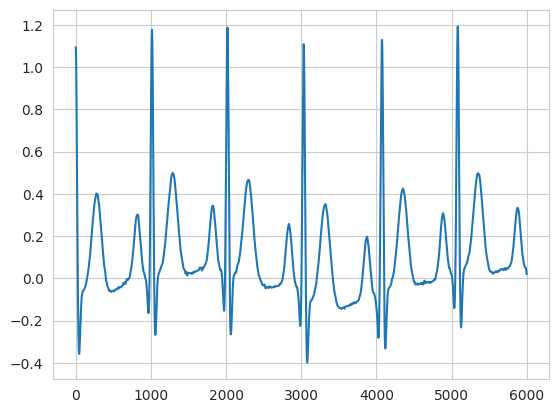

In [233]:
plt.plot(ecg_low)


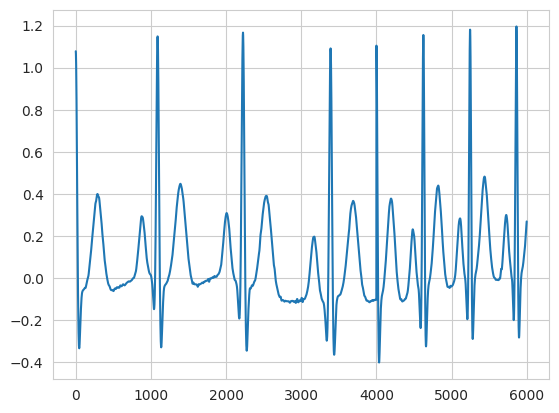

In [232]:
plt.plot(ecg_high)

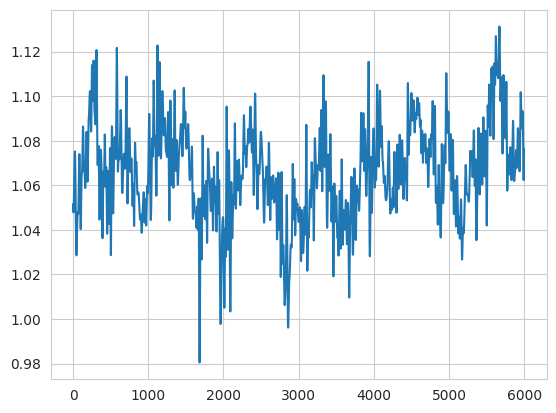

In [234]:
plt.plot(eda_low)

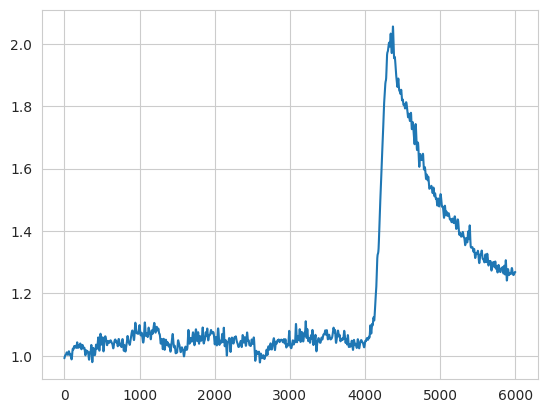

In [235]:
plt.plot(eda_high)